In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.datasets.load_trees import load_trees_from_file
from src.utils.tree_utils import get_taxa_names
from src.utils.tree_utils import get_tree_height
from src.distribution_analysis.process_tree import get_observed_nodes, get_clade_split_df

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [3]:
REFERENCE_TREE_FILE = Path("/Users/ochsneto/Documents/TreeDistributions/ccd-validation/data/mcmc/yule-50-1.trees")
REFERENCE_TREE_FILE = Path("/Users/ochsneto/Documents/TreeDistributions/ccd-validation/data/mcmc/yule-50-1.trees")
SAMPLE_TREES_FILE = Path("/Users/ochsneto/Documents/TreeDistributions/ccd-validation/data/processed/yule-50-1_CCD1 + Height (LogNormal) Ratio (Beta)_samples.trees")
NUM_TAXA = 50

In [4]:
ref_trees = load_trees_from_file(REFERENCE_TREE_FILE)

In [5]:
sample_trees = load_trees_from_file(SAMPLE_TREES_FILE)
sample_trees = [
    t for t in sample_trees if get_tree_height(t) < 100
]

In [6]:
taxa_names = get_taxa_names(ref_trees[0])

In [7]:
sample_clades, sample_clade_splits = get_observed_nodes(sample_trees, taxa_names)
ref_clades, ref_clade_splits = get_observed_nodes(ref_trees, taxa_names)

sample_branches = get_clade_split_df(sample_clade_splits)
ref_branches = get_clade_split_df(ref_clade_splits)

In [8]:
get_tree_height(ref_trees[0])

0.25179931663422395

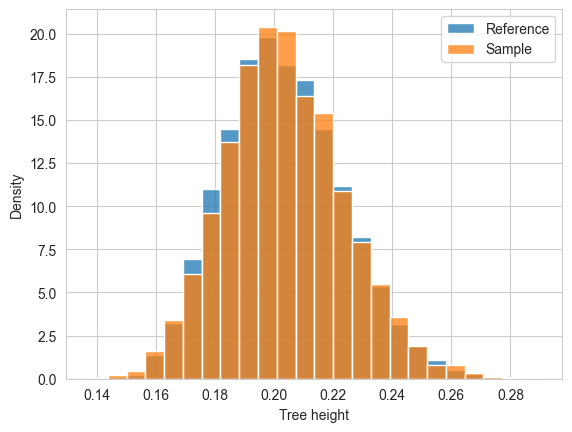

In [9]:
from random import sample
import numpy as np

NUM_PAIRS = 5_000
SAMPLE_SIZE = 5_000
NUM_BINS = 25


ref_tree_heights = [
    get_tree_height(tree)
    for tree in sample(ref_trees, min(SAMPLE_SIZE, len(ref_trees)))
]
sample_tree_heights = [
    get_tree_height(tree)
    for tree in sample(sample_trees, min(SAMPLE_SIZE, len(sample_trees)))
]


def _get_bins(items: list[float]):
    min_item = np.percentile(items, 0.001)
    max_item = np.percentile(items, 99.999)
    return np.linspace(min_item, max_item, NUM_BINS)

bins = _get_bins(ref_tree_heights)

sns.histplot(ref_tree_heights, stat="density", label="Reference", bins=bins)
sns.histplot(sample_tree_heights, stat="density", label="Sample", bins=bins)

plt.xlabel("Tree height")
plt.legend(loc="upper right")

In [10]:
sample_branches

,tree_index,newick_tree,clade_split,left_branch,right_branch,min_branch,min_branch_down,max_branch,distance_to_root,distance_to_leaf,height,clade_split_count
0,0,"((((((0,49),(((1,34),39),(((13,6),((15,7),((25...",0000000001||1000000000000000000000000000000000...,0.001475,0.001475,0.001475,NaN,0.001475,5,1,0.200046,10000
1,0,"((((((0,49),(((1,34),39),(((13,6),((15,7),((25...",0000000010||10000000000000000000000000000,0.001835,0.001835,0.001835,NaN,0.001835,7,1,0.199686,7311
2,0,"((((((0,49),(((1,34),39),(((13,6),((15,7),((25...",10000000000000000000000000010||100000000000000...,0.005235,0.007070,0.005235,0.001835,0.007070,6,2,0.194451,7311
3,0,"((((((0,49),(((1,34),39),(((13,6),((15,7),((25...",0000100000||1000000000000000000000000000000000...,0.003184,0.003184,0.003184,NaN,0.003184,8,1,0.198337,10000
4,0,"((((((0,49),(((1,34),39),(((13,6),((15,7),((25...",0010000000||1000000000000000000000000000000000...,0.009255,0.009255,0.009255,NaN,0.009255,9,1,0.192266,10000
...,...,...,...,...,...,...,...,...,...,...,...,...
489995,9999,"(((((0,49),(((((1,34),39),((16,20),((38,9),8))...",100000000000000000001000000000||10000000000000...,0.028590,0.022195,0.022195,0.010384,0.028590,3,2,0.177910,9995
489996,9999,"(((((0,49),(((((1,34),39),((16,20),((38,9),8))...",10000000100000000000100000001000000000||100000...,0.007391,0.039970,0.007391,0.022195,0.039970,2,3,0.170518,3912
489997,9999,"(((((0,49),(((((1,34),39),((16,20),((38,9),8))...",1000000000000000000000000000||1000000000000000...,0.021593,0.021593,0.021593,NaN,0.021593,2,1,0.188895,9998
489998,9999,"(((((0,49),(((((1,34),39),((16,20),((38,9),8))...",10000000100000000000100000011000000000||100000...,0.000454,0.018831,0.000454,0.007391,0.018831,1,4,0.170064,3911


11111101111101111111010111111111011111100111111111||10000010000000101000000000100000011000000000


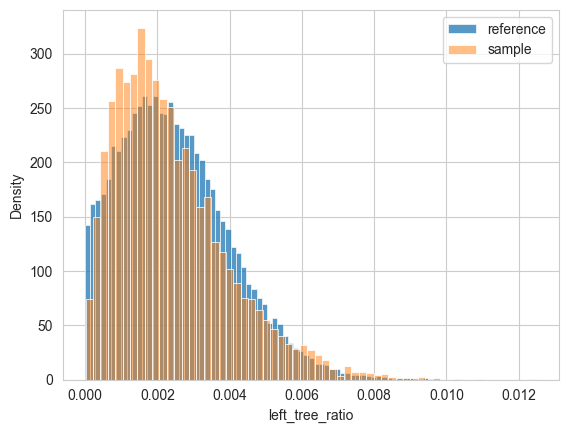

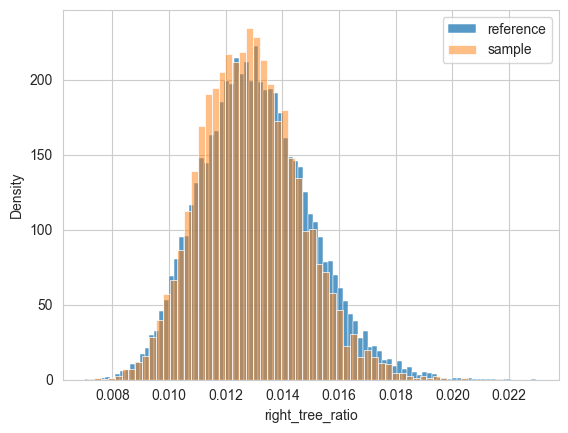

1000100000000000000000000100000000000000||1000101000000000000000100010000000000000000


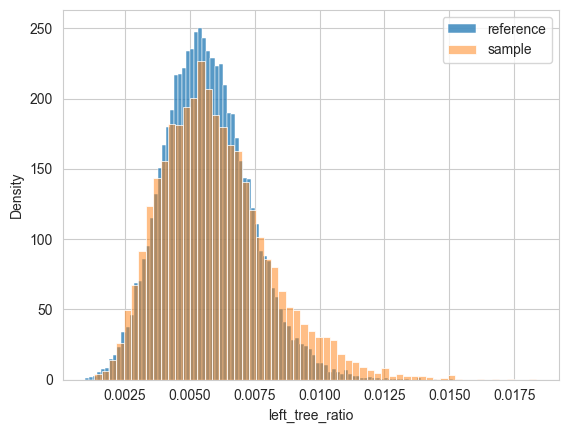

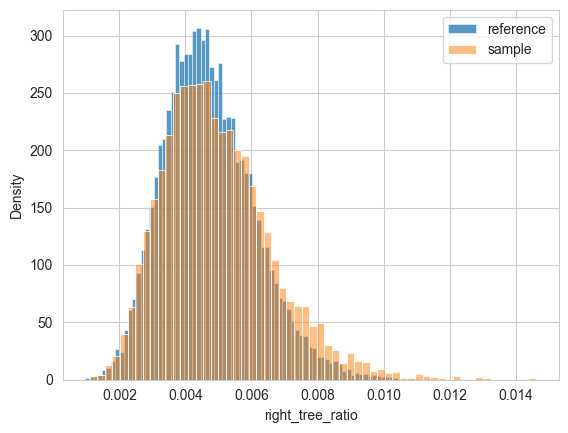

1000110000000000000010001000000000000001011100||1001101100000000000000100010100000000000000


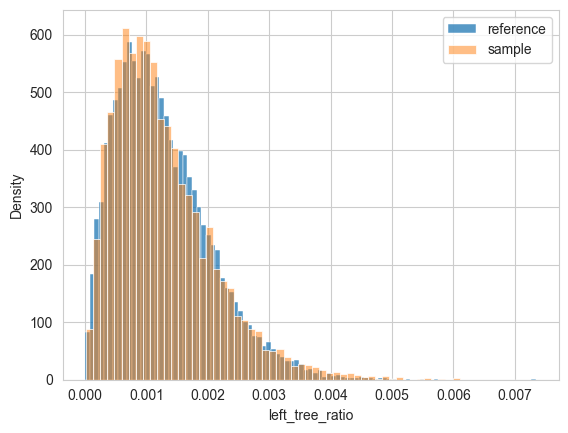

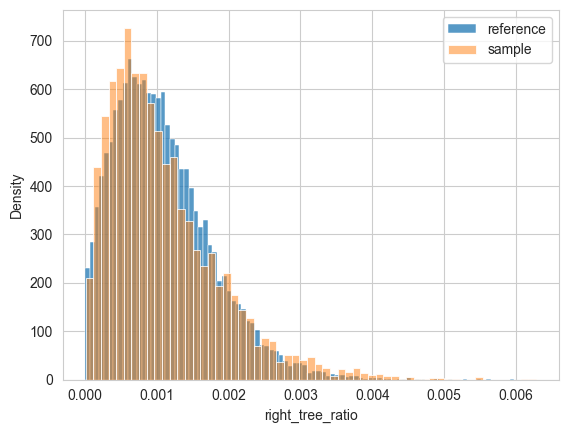

110000000000000000000000010011000000000010100000||11000000000000000100000000000000000010000100000000


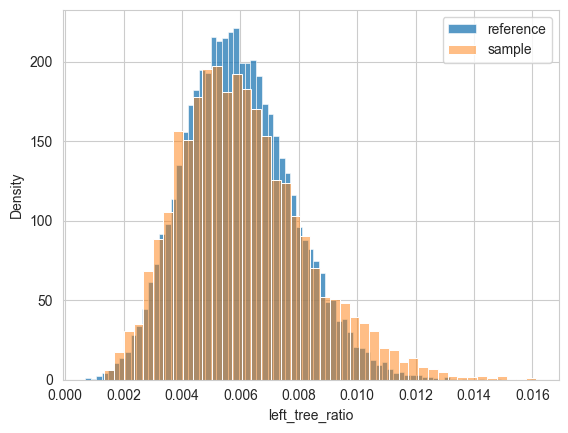

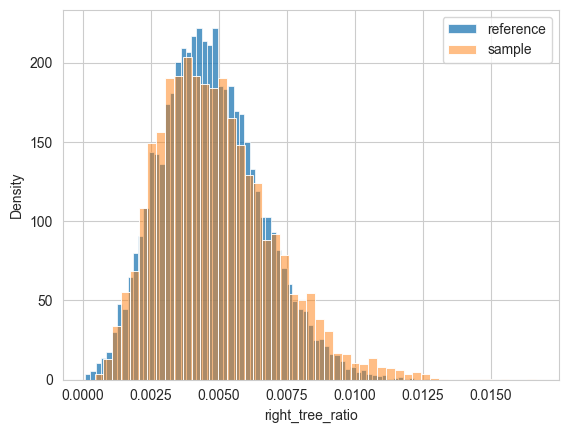

1000010000000000000000000000000010||11110000000000000100000000010011000010000110100000


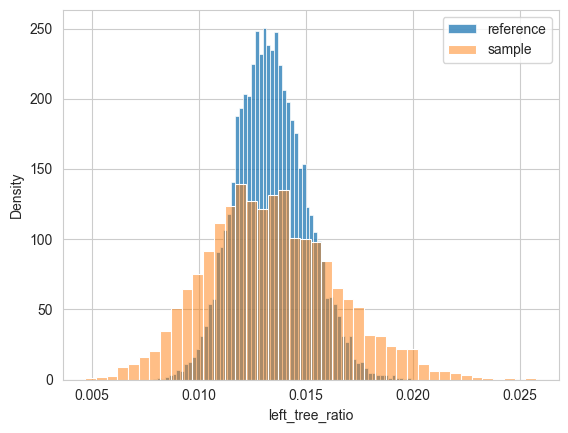

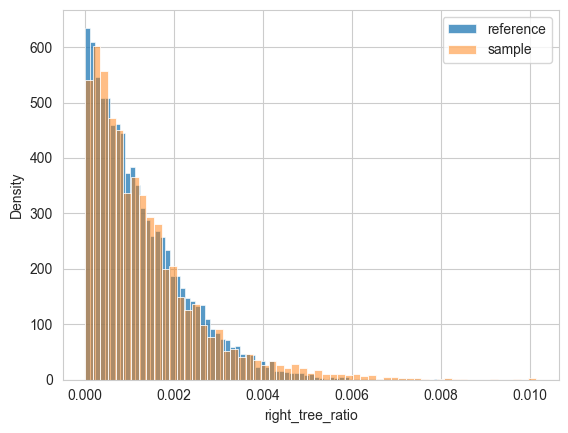

11110100000000011111010100010011001011100110100011||1001111101100000000010101100010100000001011100


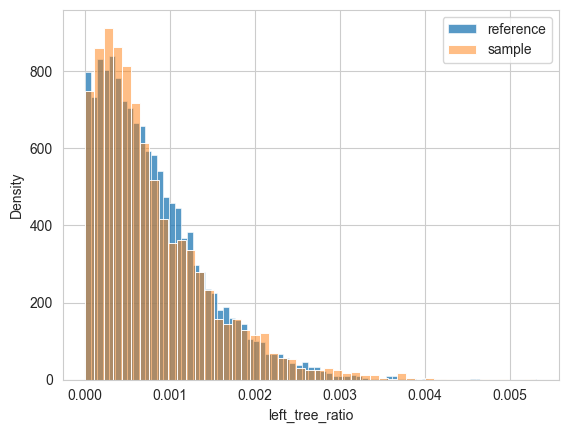

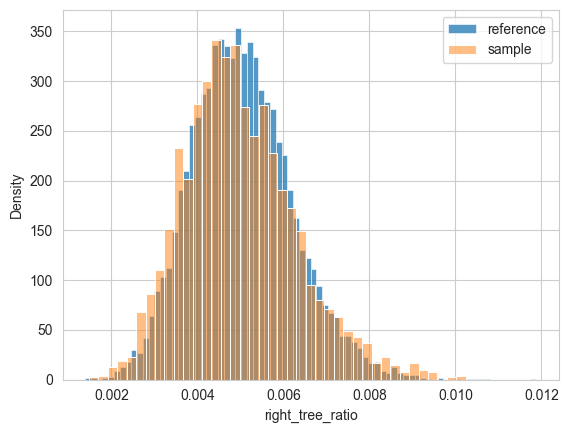

In [11]:
from collections import Counter

sample_branches["left_tree_ratio"] = sample_branches.left_branch / sample_branches.distance_to_leaf
sample_branches["right_tree_ratio"] = sample_branches.right_branch / sample_branches.distance_to_leaf

ref_branches["left_tree_ratio"] = ref_branches.left_branch / ref_branches.distance_to_leaf
ref_branches["right_tree_ratio"] = ref_branches.right_branch / ref_branches.distance_to_leaf

for clade, _ in Counter(ref_branches.clade_split).most_common(50):
    if len(list(filter(lambda x: x == "1", clade.split("||")[0]))) <= 2: continue 
    if len(list(filter(lambda x: x == "1", clade.split("||")[1]))) <= 2: continue 
    
    print(clade)

    sns.histplot(
        ref_branches[ref_branches.clade_split == clade], 
        x="left_tree_ratio", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_branches.clade_split == clade], 
        x="left_tree_ratio", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()

    sns.histplot(
        ref_branches[ref_branches.clade_split == clade], 
        x="right_tree_ratio", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_branches.clade_split == clade], 
        x="right_tree_ratio", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()

In [12]:
import pandas as pd


df_dict = {
    "clade": [],
    "left_branch": [],
    "right_branch": [],
}

for clade in ref_clades:
    if clade.is_leaf: continue

    df_dict["clade"].append(str(clade))

    left = clade.left_clade.height - clade.height
    right = clade.right_clade.height - clade.height

    df_dict["left_branch"].append(left)
    df_dict["right_branch"].append(right)

ref_clades_df = pd.DataFrame(df_dict)

df_dict = {
    "clade": [],
    "left_branch": [],
    "right_branch": [],
}

for clade in sample_clades:
    if clade.is_leaf: continue

    df_dict["clade"].append(str(clade))

    left = clade.left_clade.height - clade.height
    right = clade.right_clade.height - clade.height

    df_dict["left_branch"].append(left)
    df_dict["right_branch"].append(right)

sample_clades_df = pd.DataFrame(df_dict)

0000000001||100000000000000000000000000000000000000000000


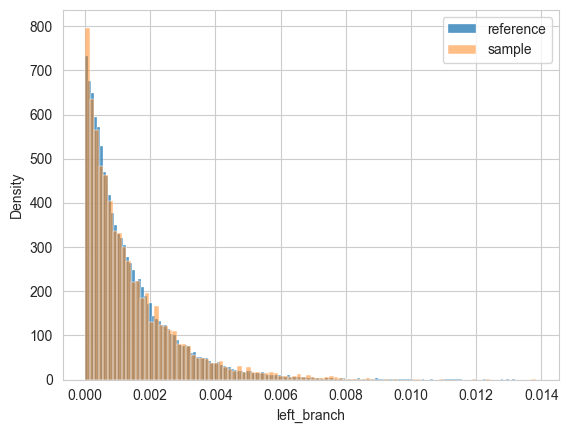

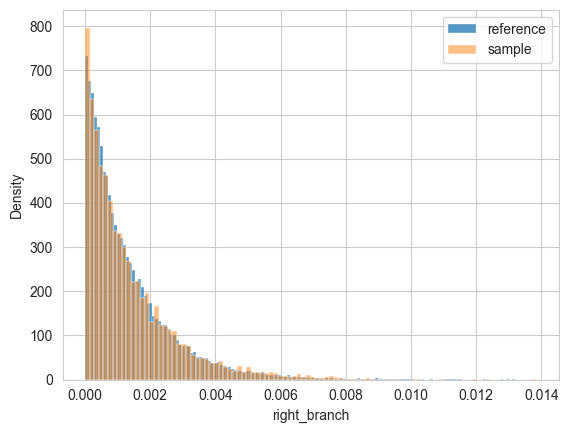

1000000000000000000000000000000000000000000000||0000001000


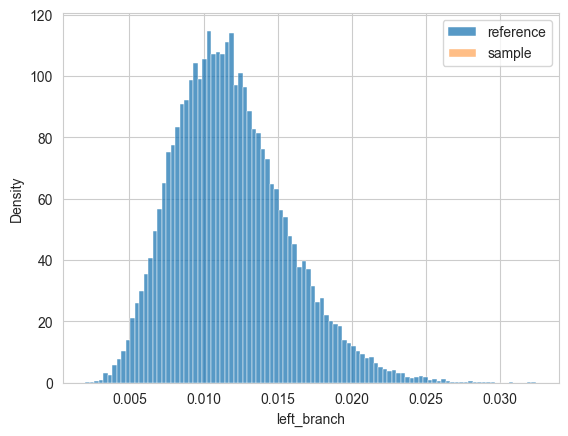

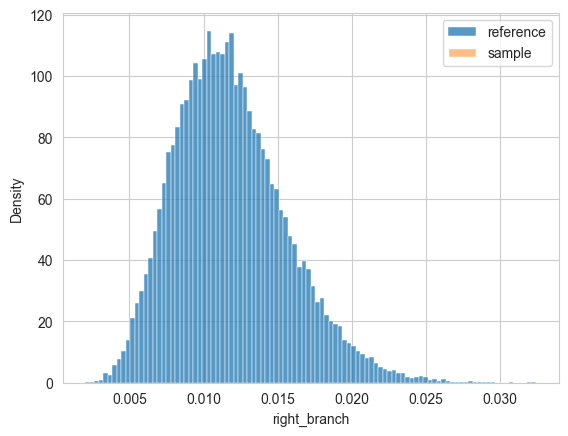

0000000100||0001000000


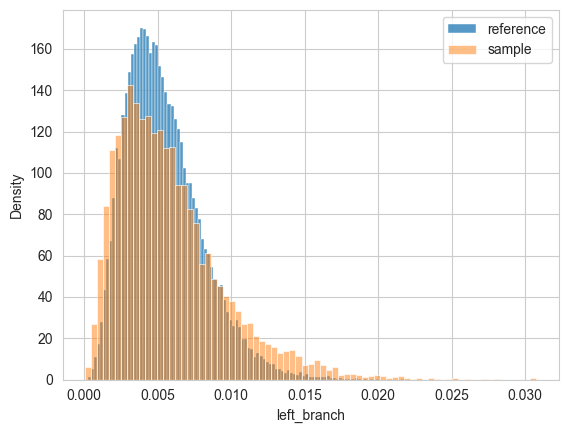

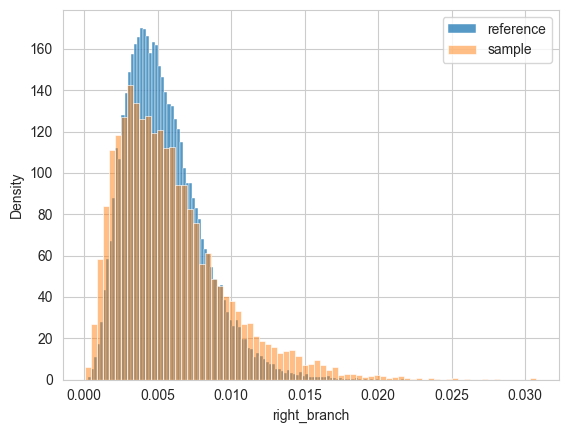

10000000000000000||1000000000000000000000000000000000000000000


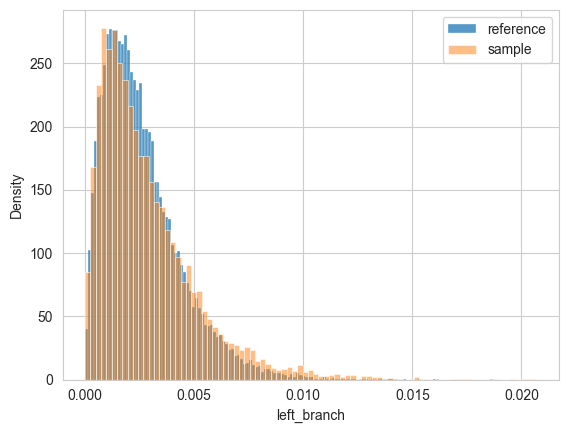

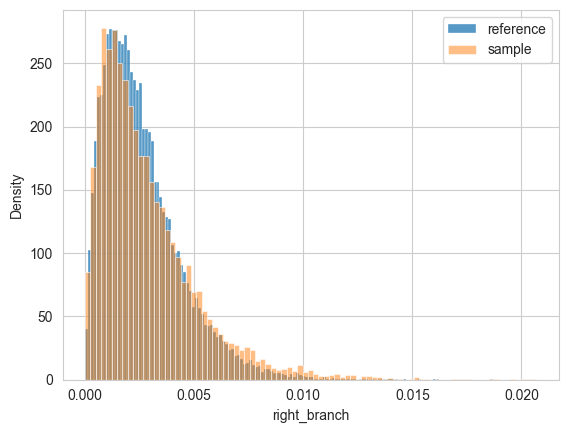

1000000000000000000000000010000000000000000||100000000000000000000


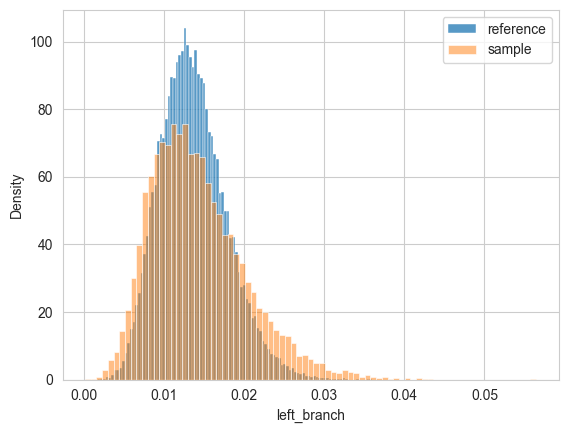

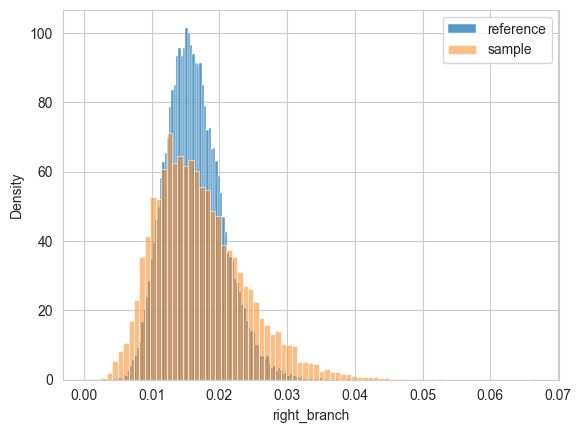

100000000000000||1000000000000000000000000000000000000000


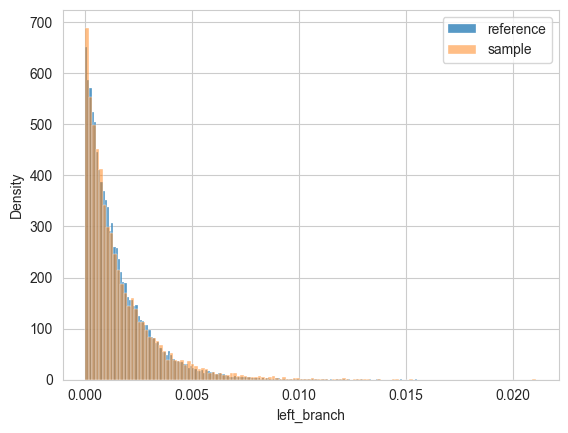

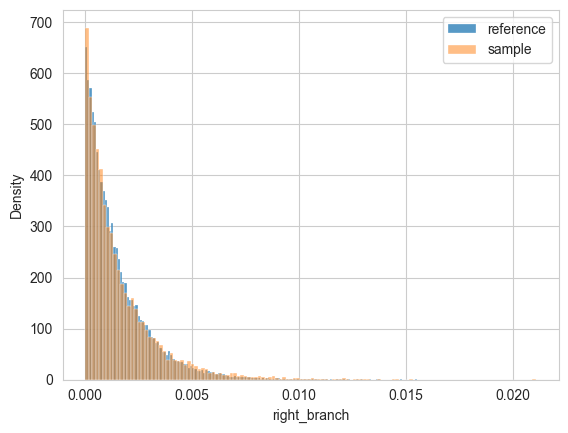

1000000000000000000000000100000000000000||100000000000000000000000000000000000


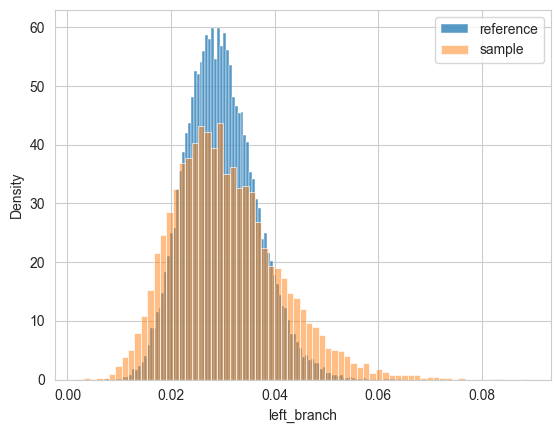

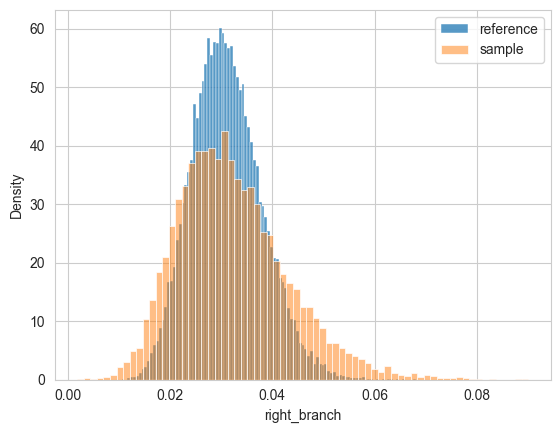

10000000000000000000000000000000000000000000000||0000100000


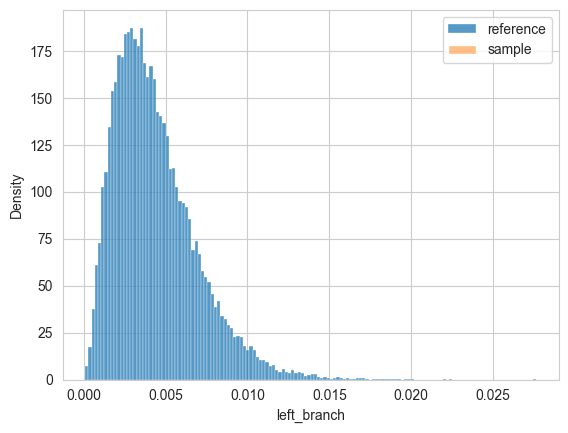

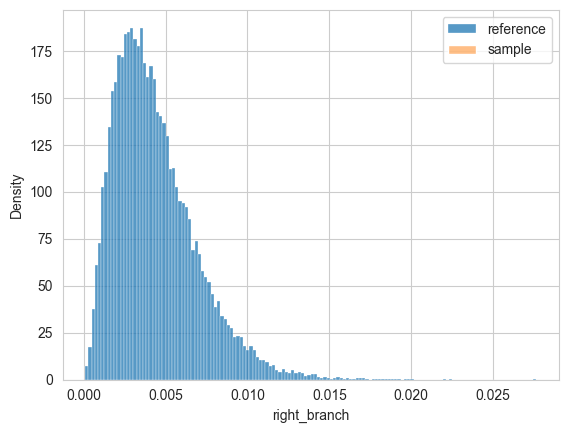

100000000000000000000000000000000000000000000000||0010000000


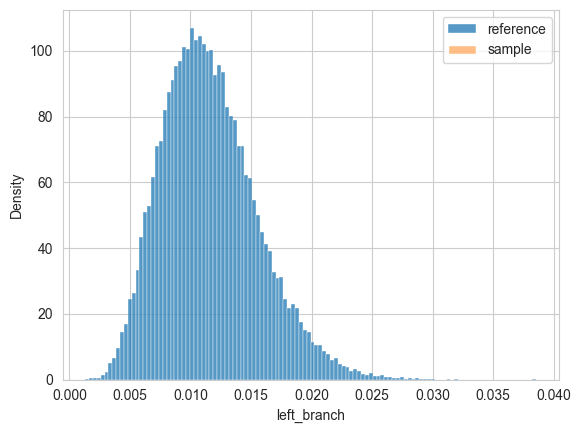

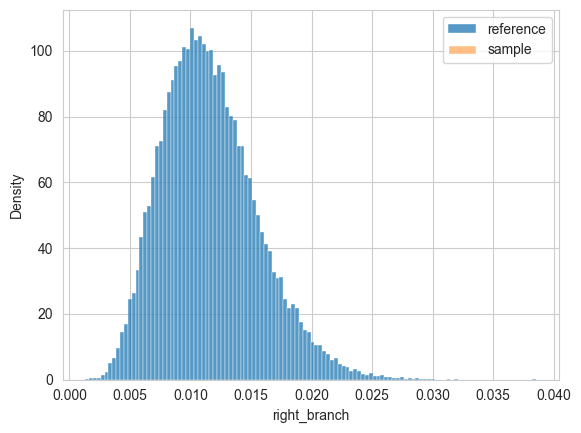

10000000000000000000000000000000000000000000000000||100000000000000000000000000000000


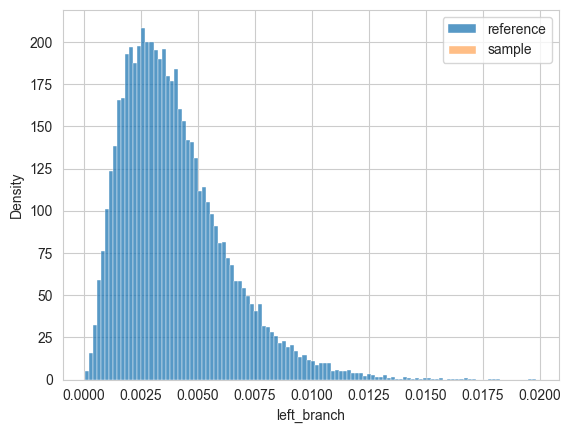

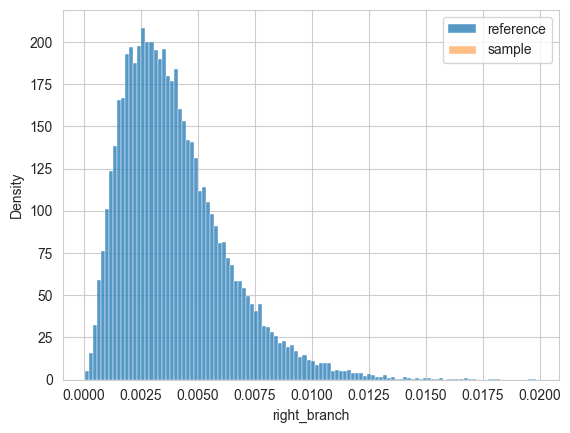

1000000000000000000000000000000000000000000000000||10000000000000000100000000000000000000000000000000


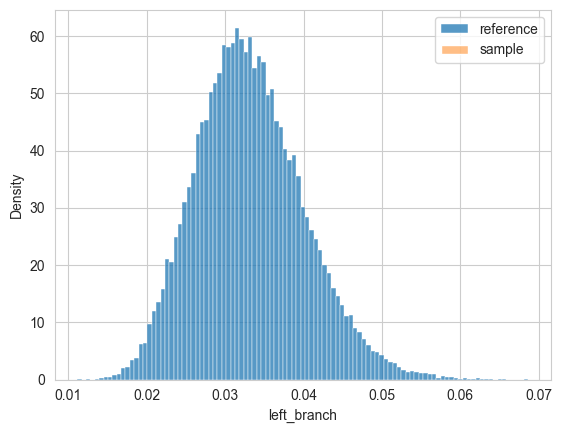

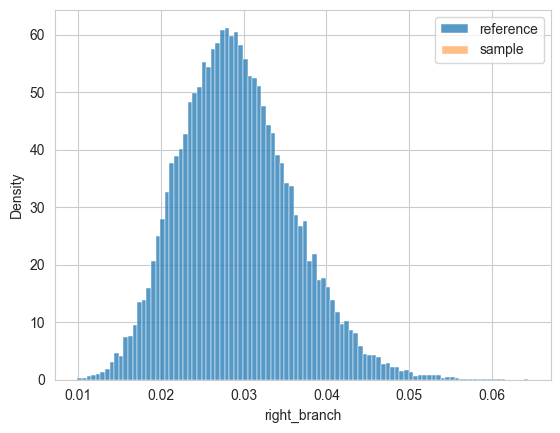

0100000000||10000000000000


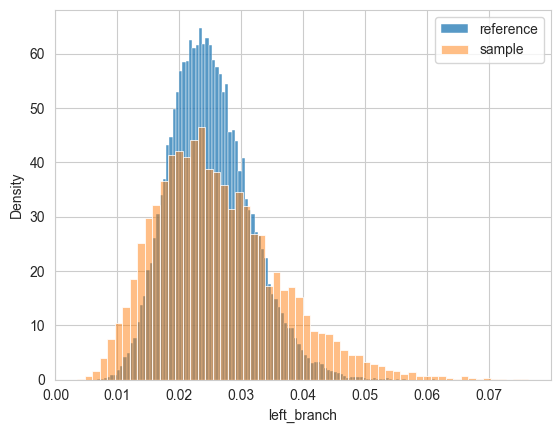

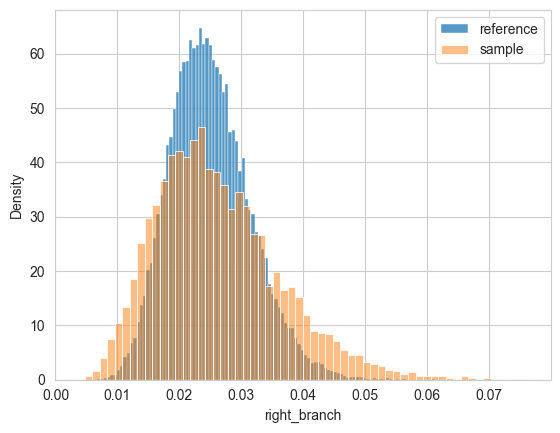

1000000000||100000000000000000000000000000


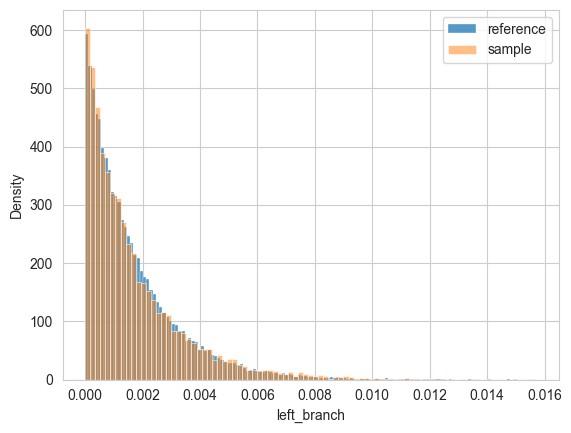

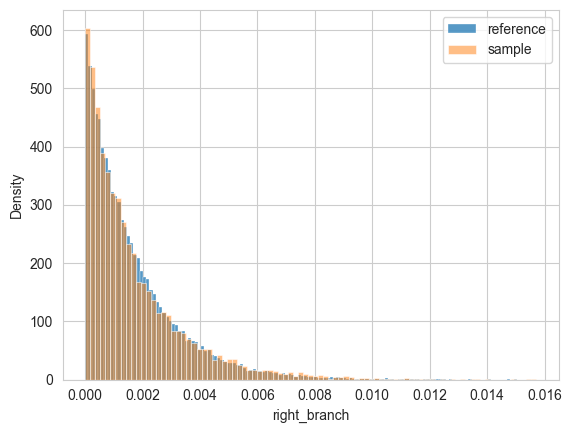

100000000000000000||10000000000000000000000000000000000000


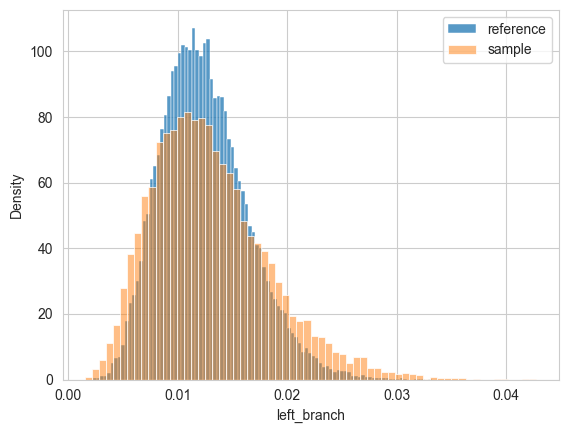

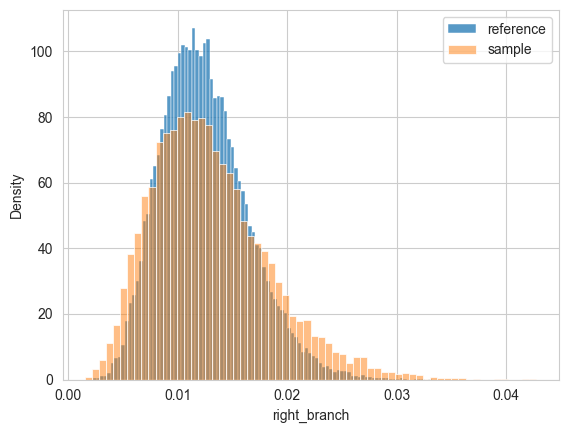

10000100000000000001000000000000||1000000000000000


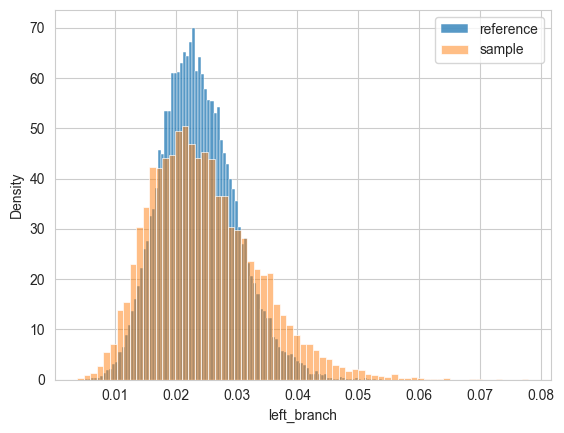

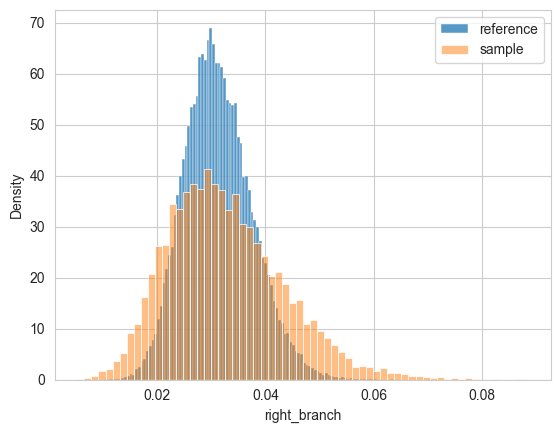

100000000000000000000000000||10000000000000000000000000000000


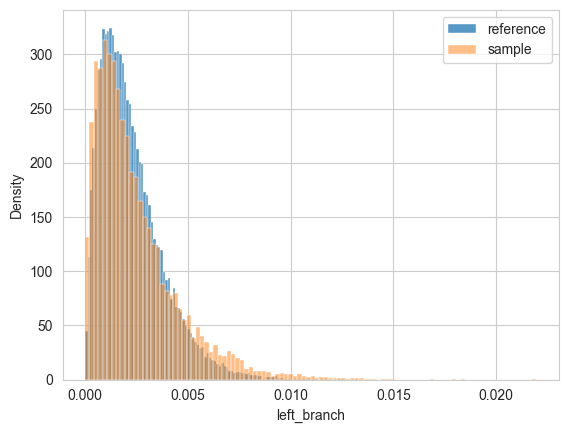

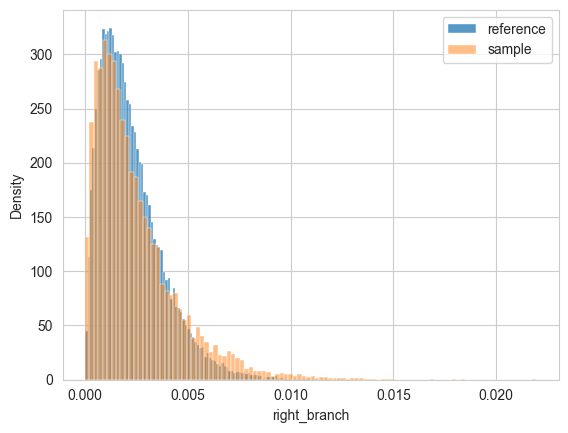

1000000000000||10000100000000000000000000000000


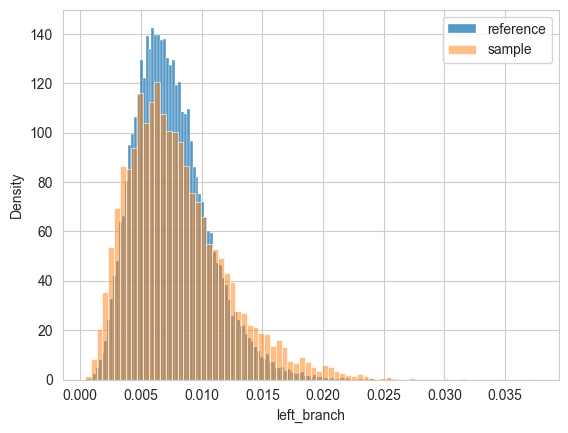

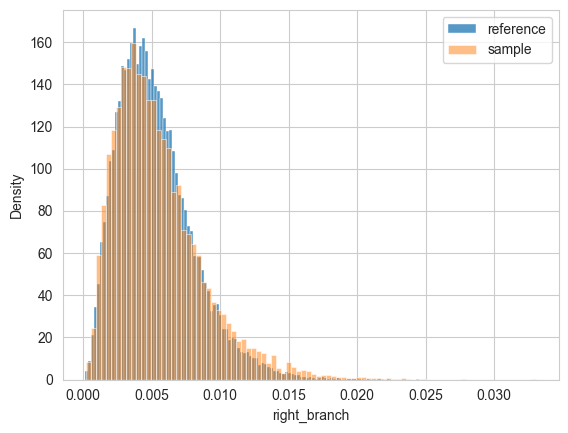

1000000000000000000000000000||10000000000000000000000000000000000000000000


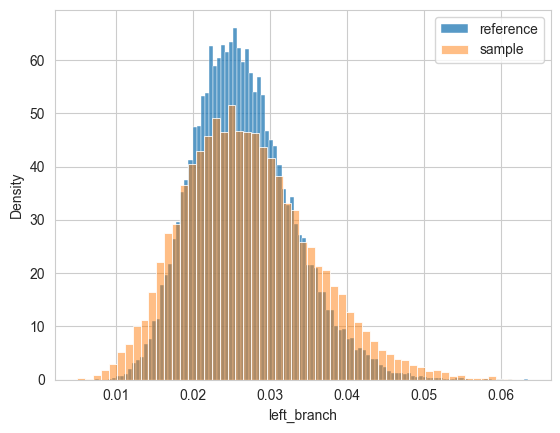

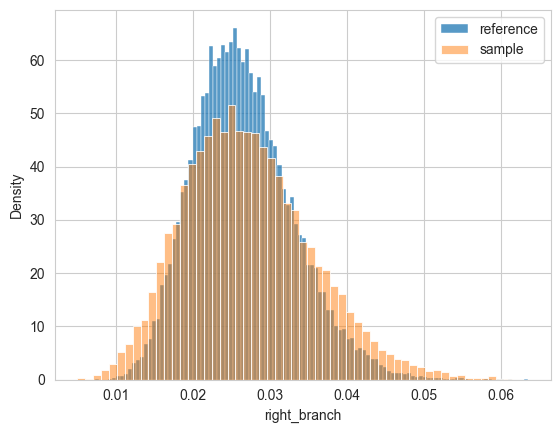

100000000000000000000000000000000000000010000000||10011000000000000000000


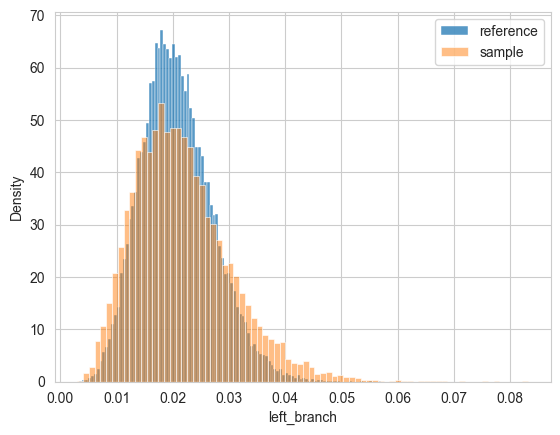

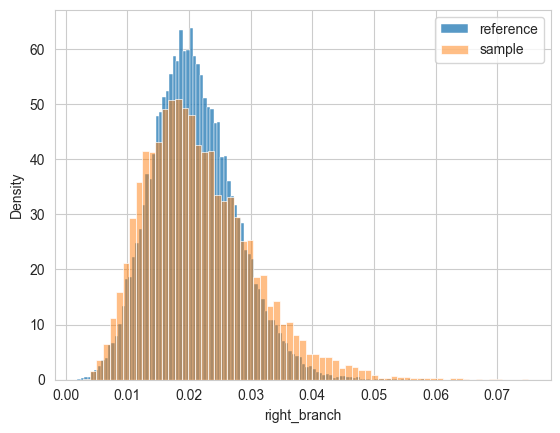

100000000000000000001000000000||10000000000000000000100000000000000000


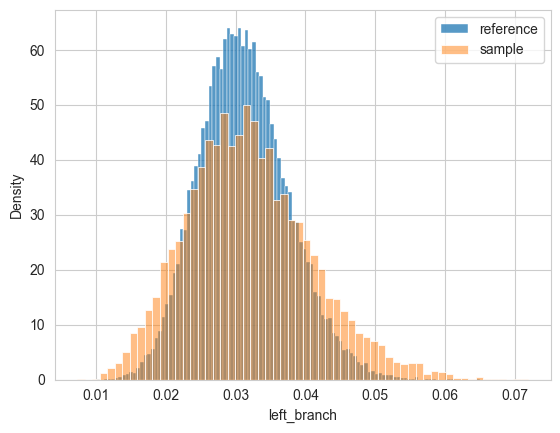

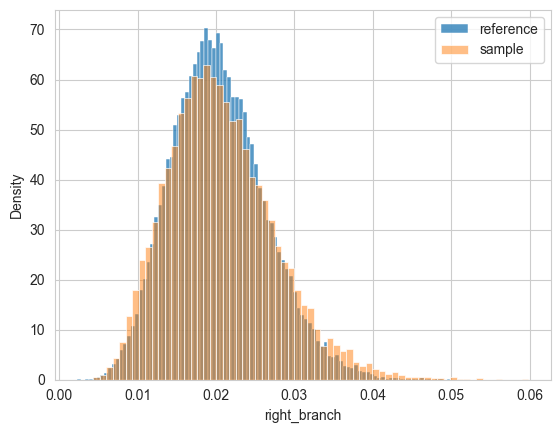

10000000000000000000000000000000000000000100000||100000000000000000000000010011000000000010000000


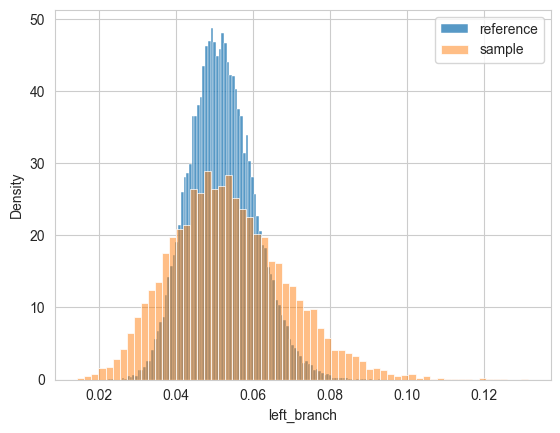

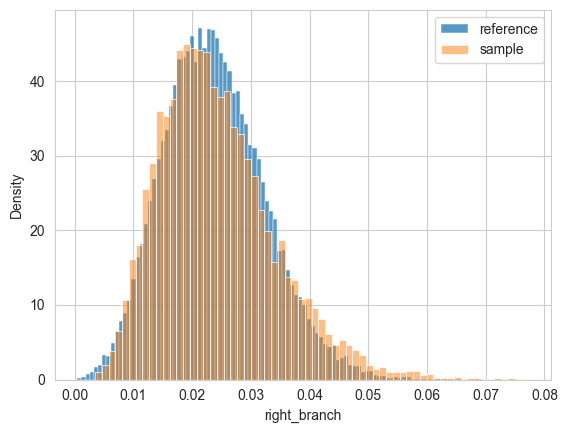

10011000100000000001001000000000000||100000000000


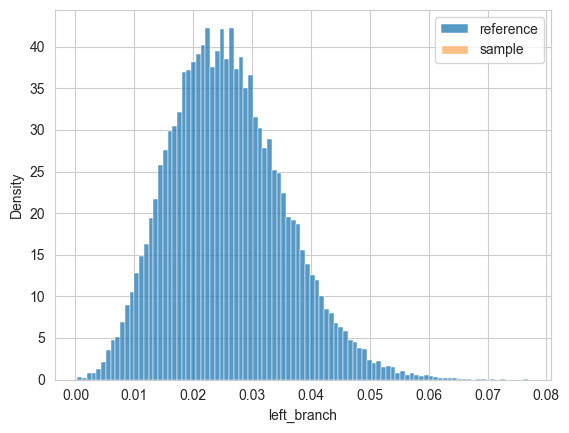

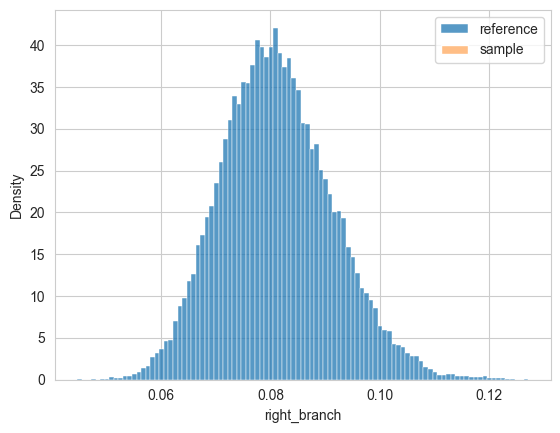

11000000000000000100000000000000000000000000000000||10000100000000


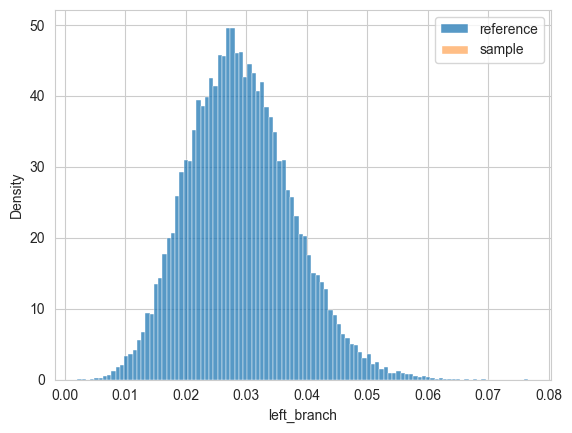

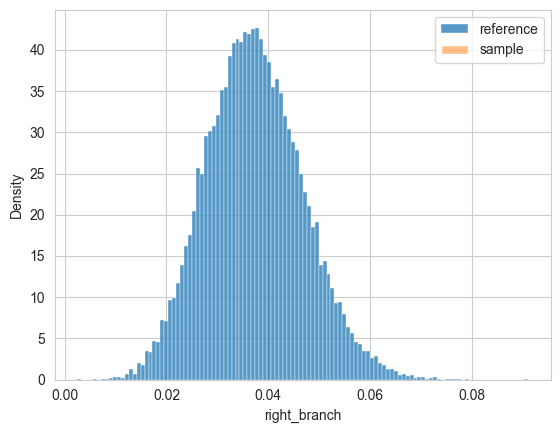

1000000000000000000000||10000000000000000000000000000000000000000


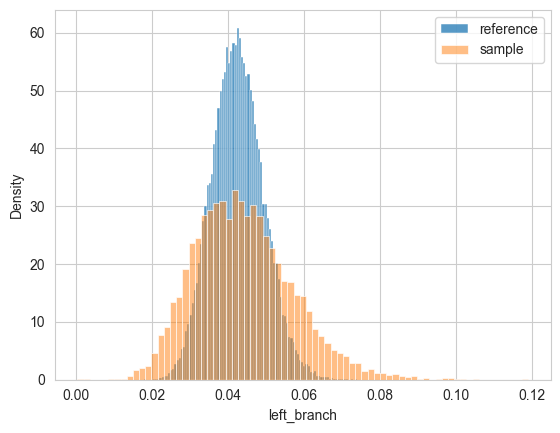

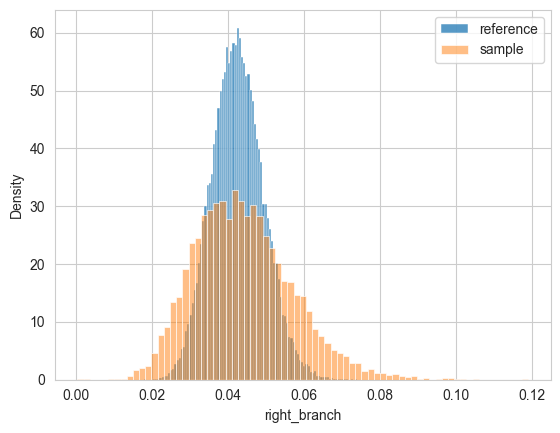

100000000000000000000000||1001111101100000000010001100010100000001011100


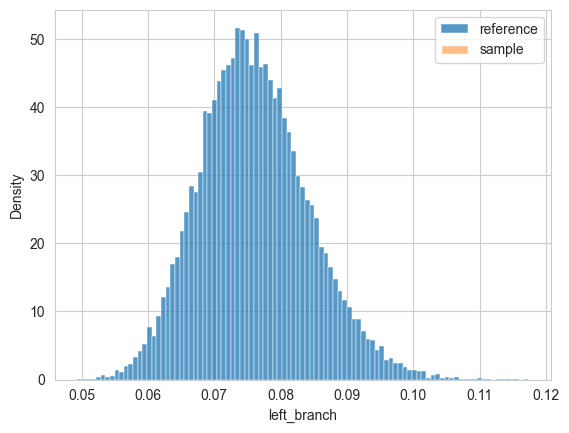

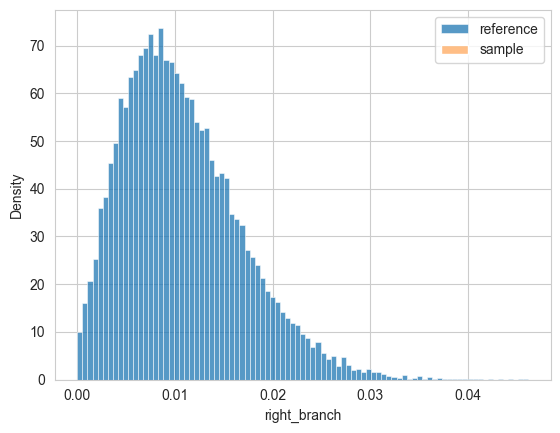

0001000100||100000000000000000000000000000000000000000


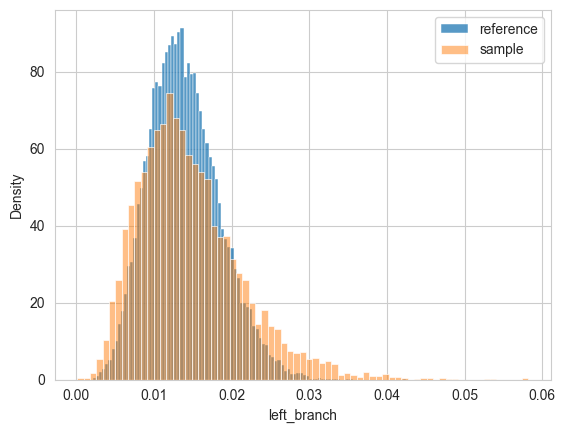

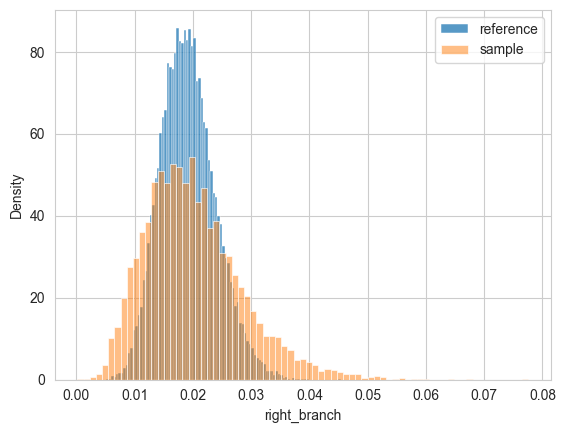

100000000000000000000000000000000001000100||10000000000000000000000000


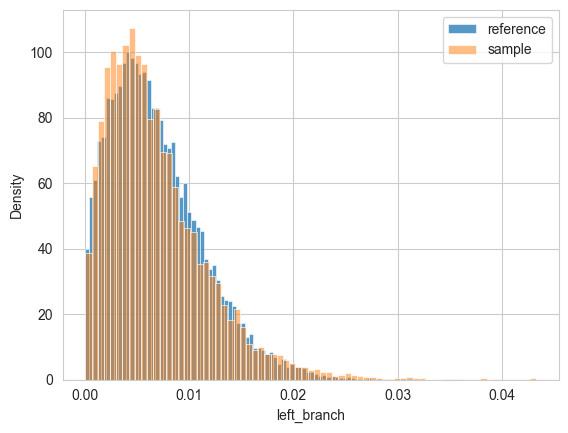

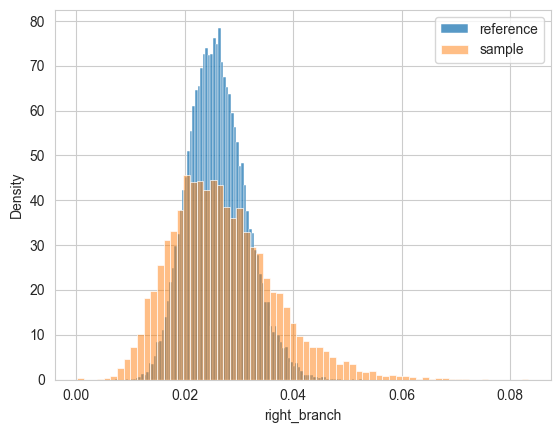

1000000000000000000000000000000000000000001000||100000000000000010000000000000000001000100


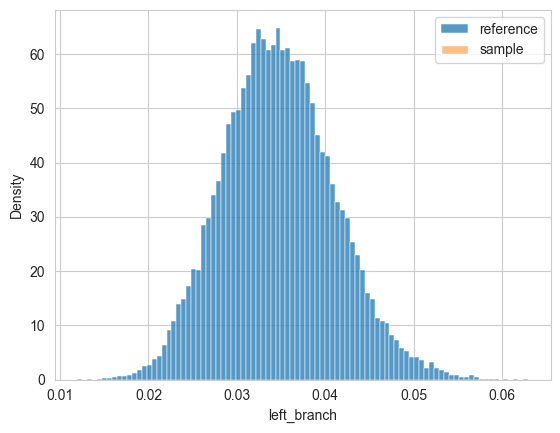

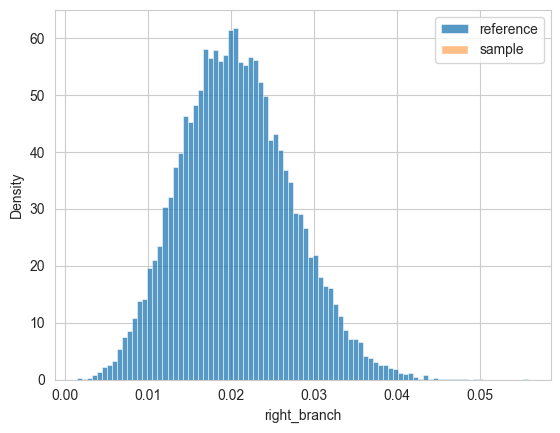

11111101111101111111010111111111011111100111111111||10000010000000101000000000100000011000000000


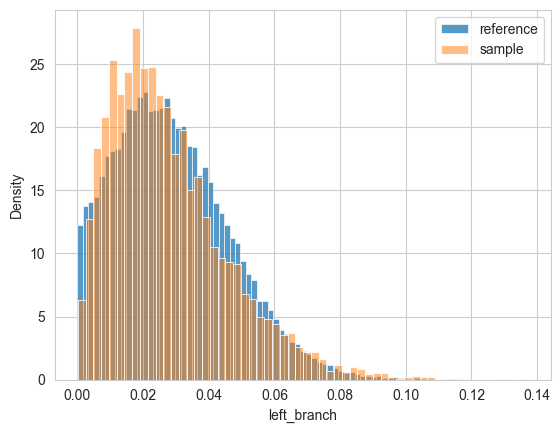

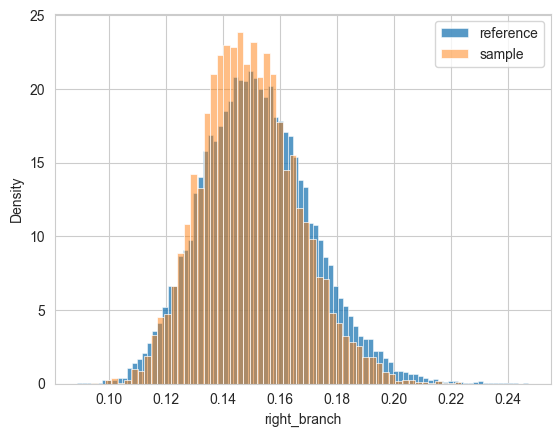

11111101111101111111010110111111011111100111111111||1000000000000000000000000


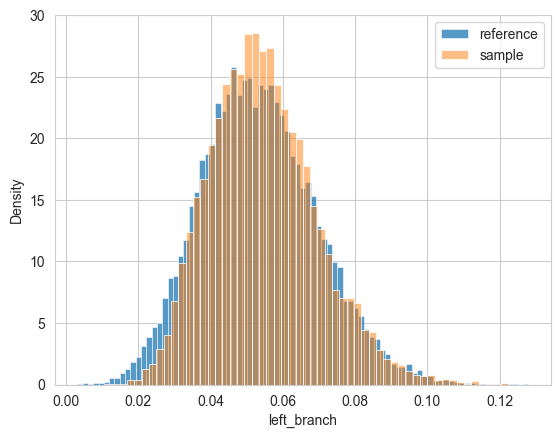

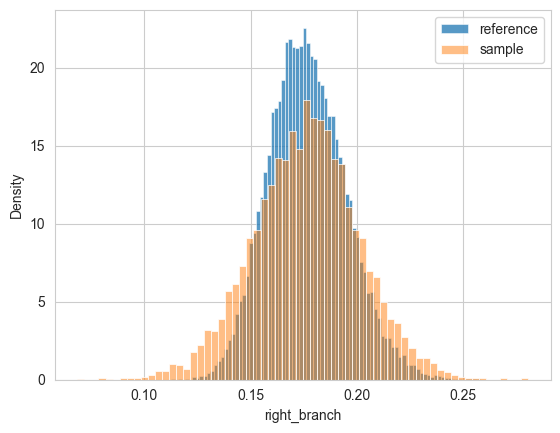

0000000010||10000000000000000000000000000


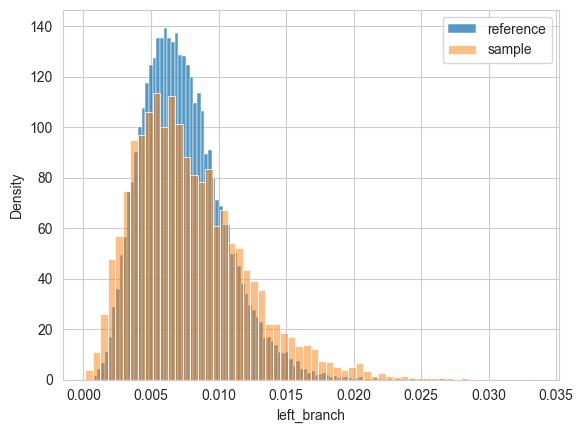

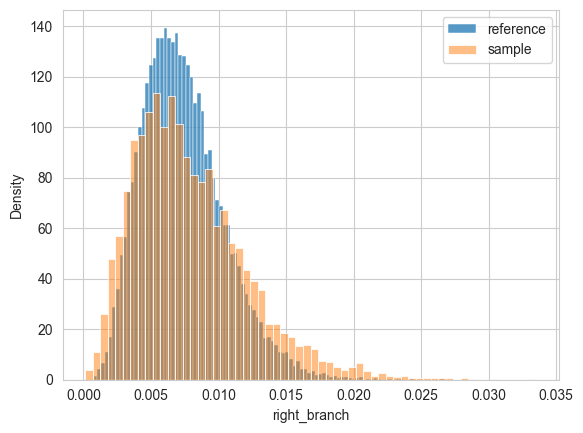

10000000000000000000000000010||1000000000000000000000000000000000


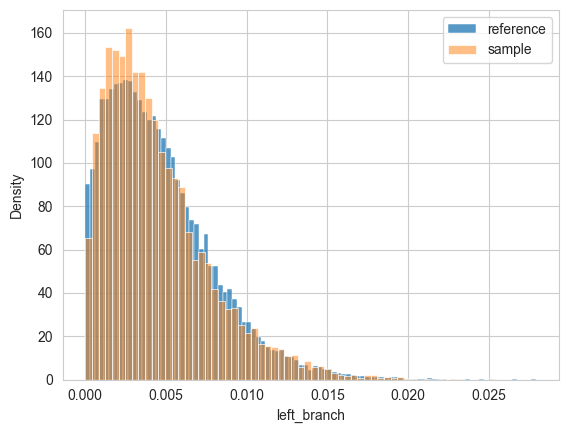

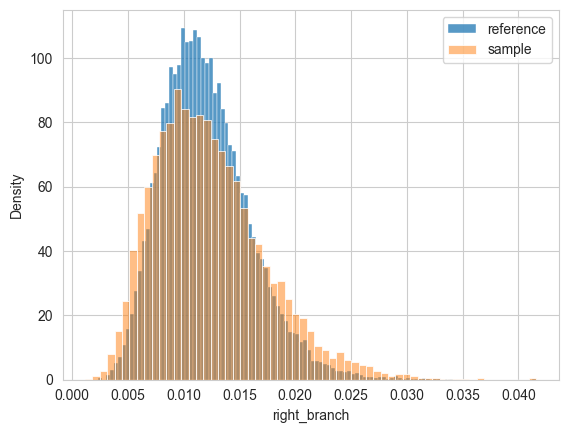

1000100000000000000000000100000000000000||1000101000000000000000100010000000000000000


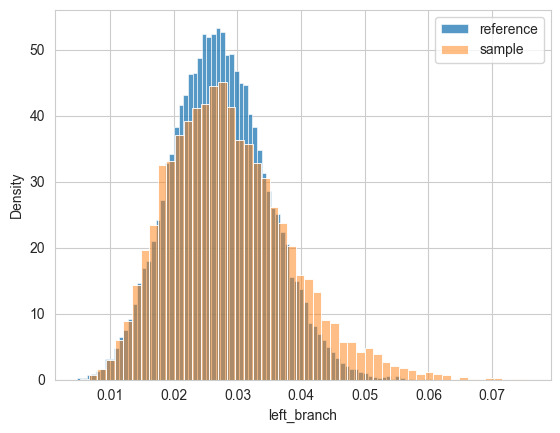

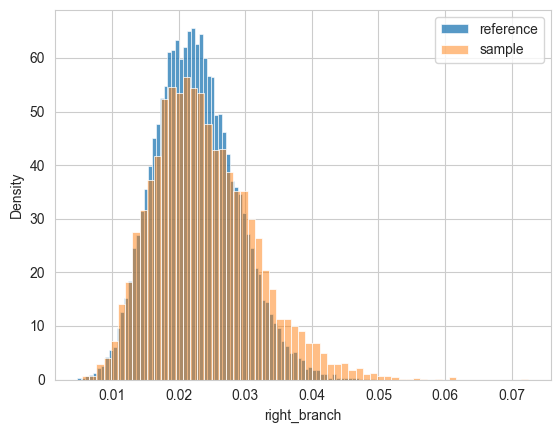

1000000000000000000000100010000000000000000||100000000000000000000000000000000000000


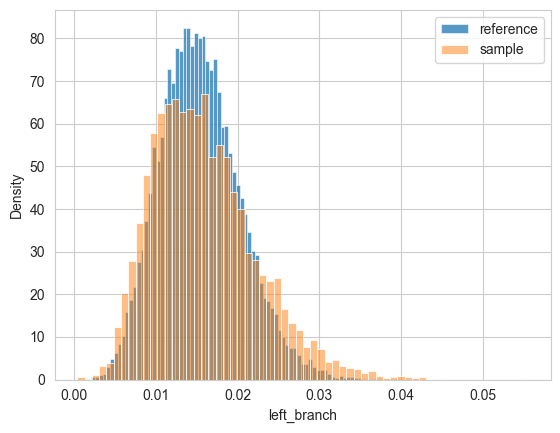

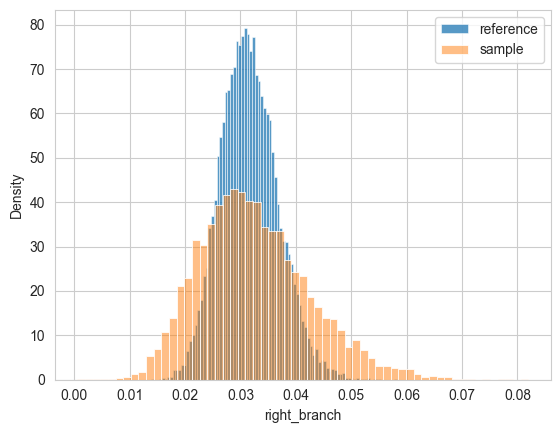

1000100000000000000000100010000000000000000||1000000000000000000000000000000000000


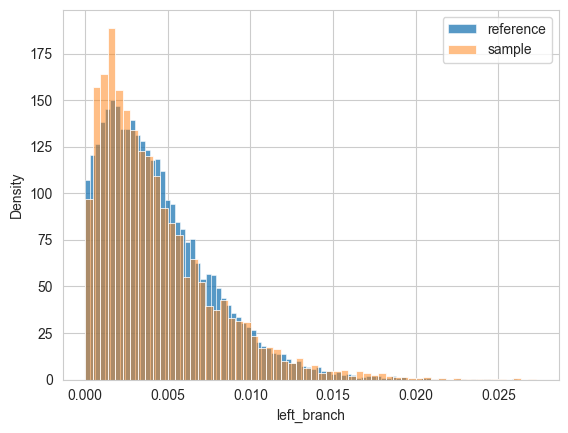

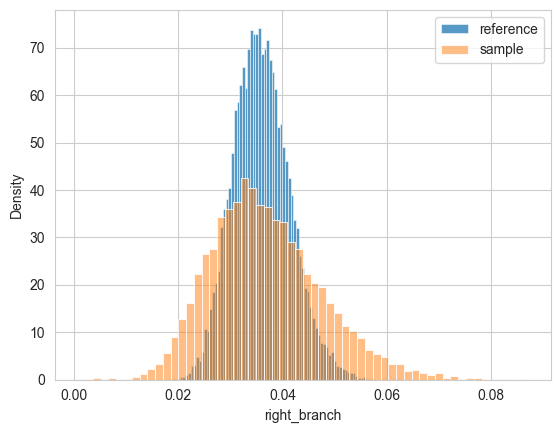

1000110000000000000010001000000000000001011100||1001101100000000000000100010100000000000000


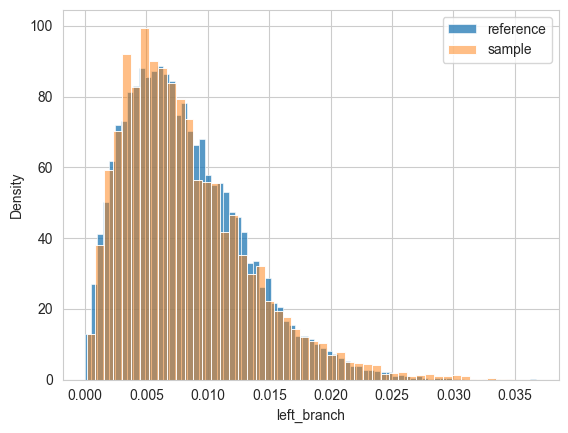

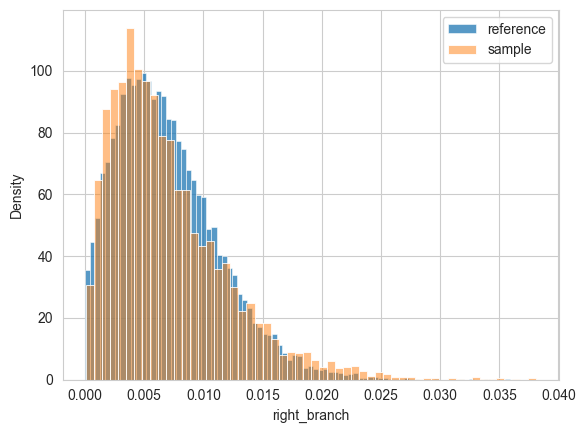

110000000000000000000000010011000000000010100000||11000000000000000100000000000000000010000100000000


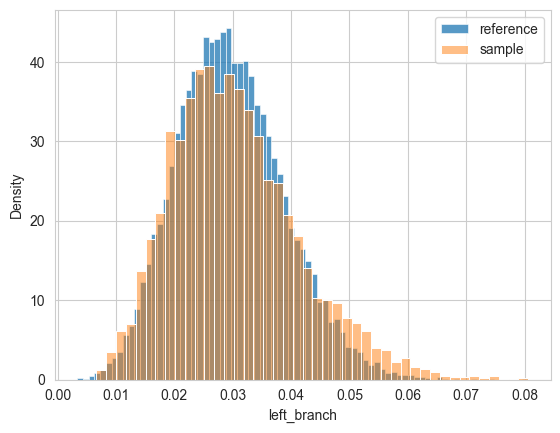

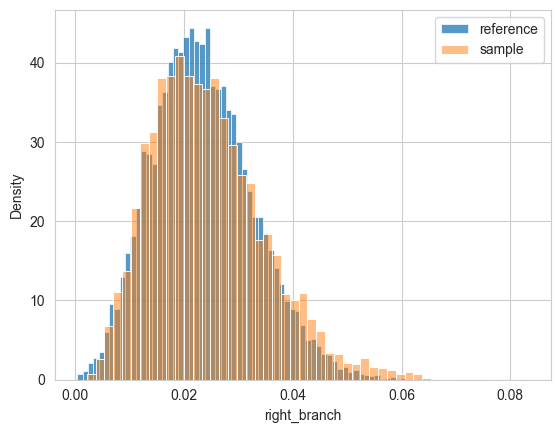

10000010000000101000000000100000001000000000||10000000000


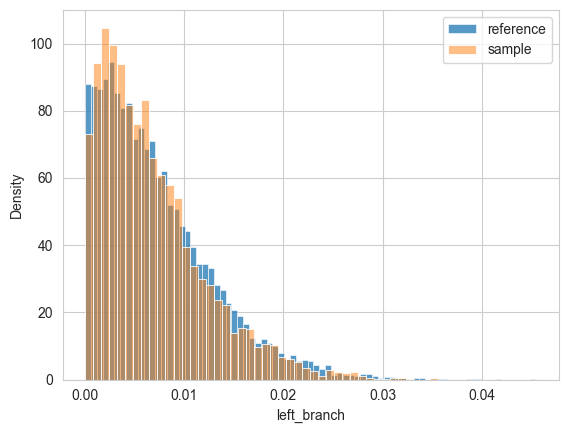

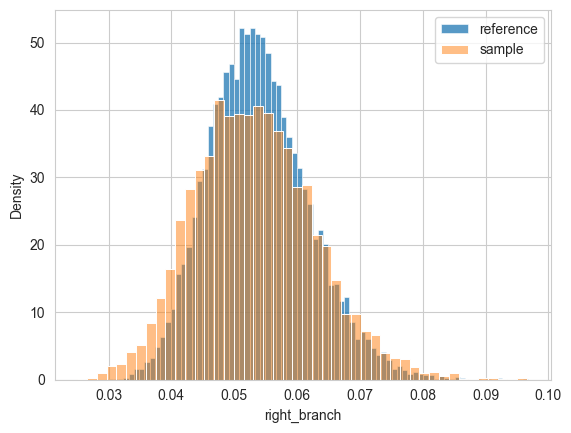

10000000100000000000100000001000000000||10000000000000001000000000000000000000000000


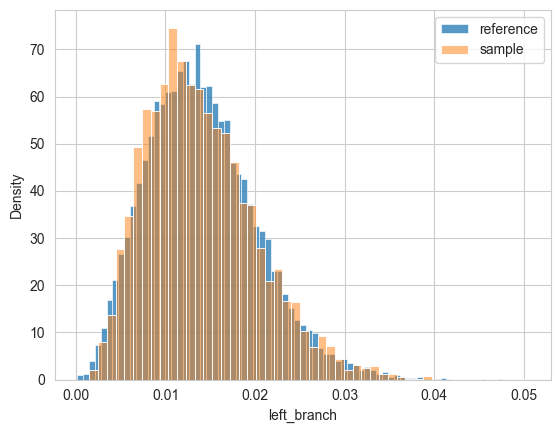

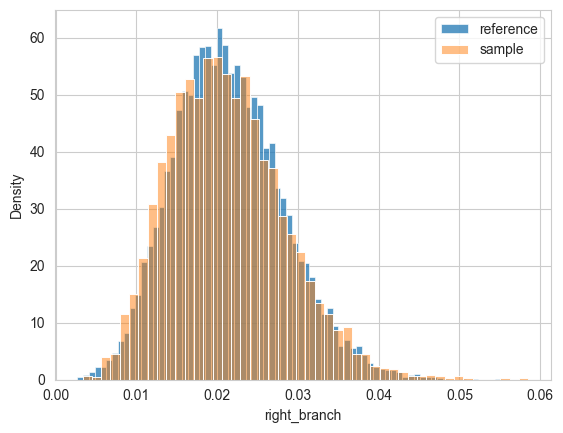

1000010000000000000000000000000010||11110000000000000100000000010011000010000110100000


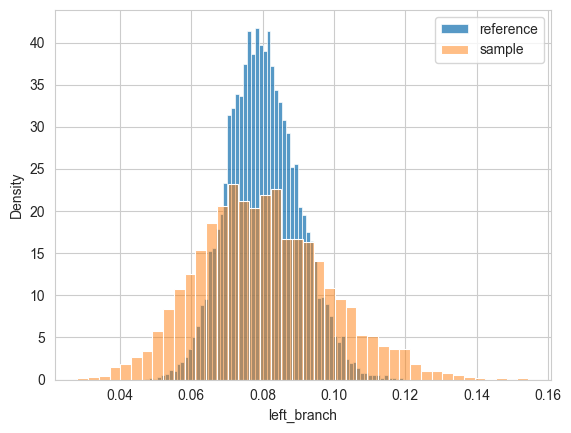

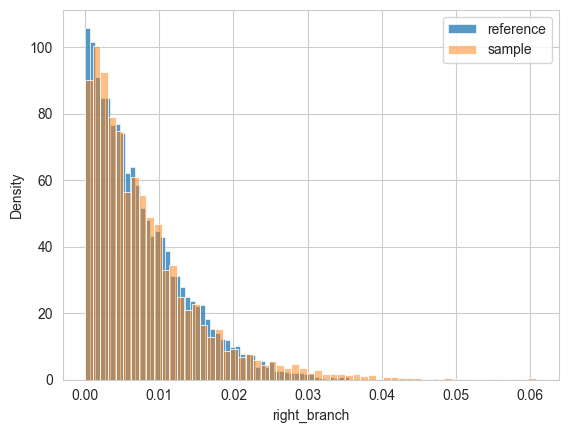

10000000000000000000||10000000000000000000000


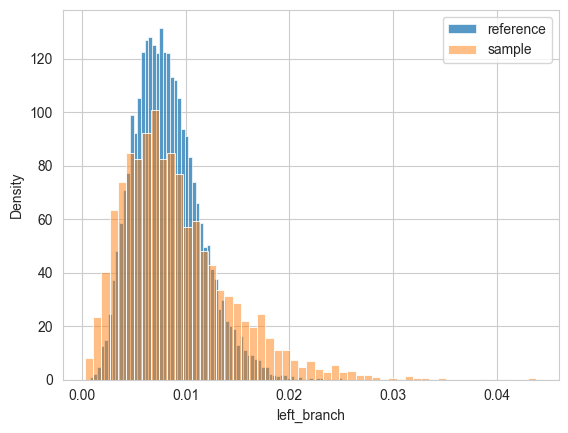

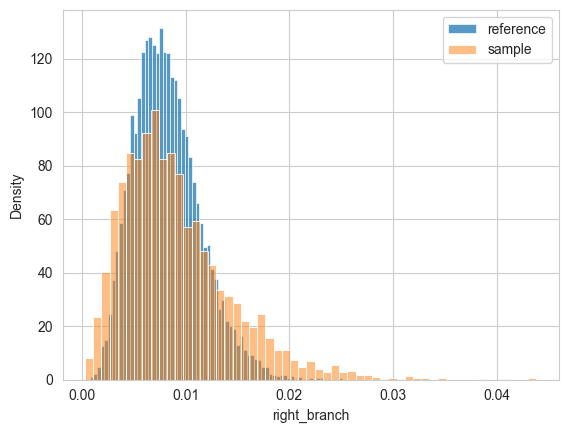

1000000000000000000||10010000000000000000000


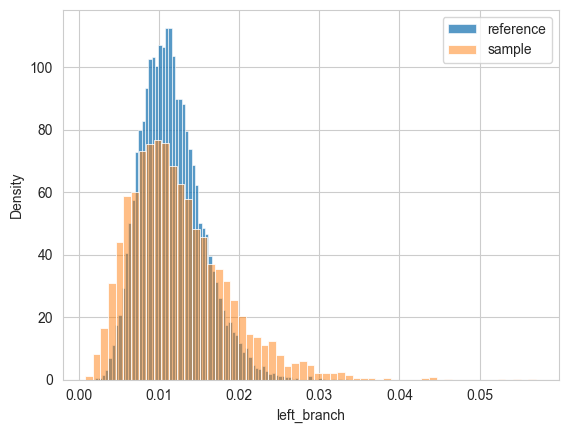

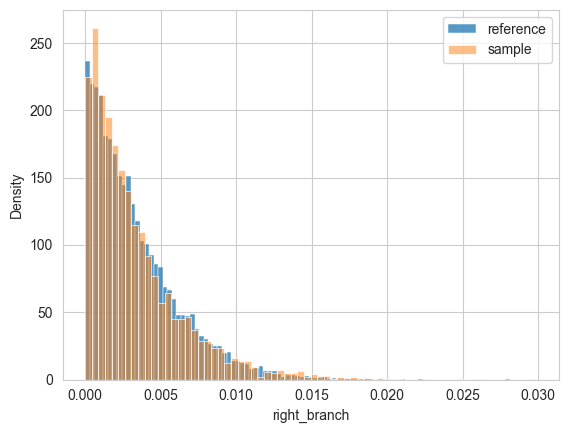

10000100000000001001000000000000||10000000000000000000000000000000000


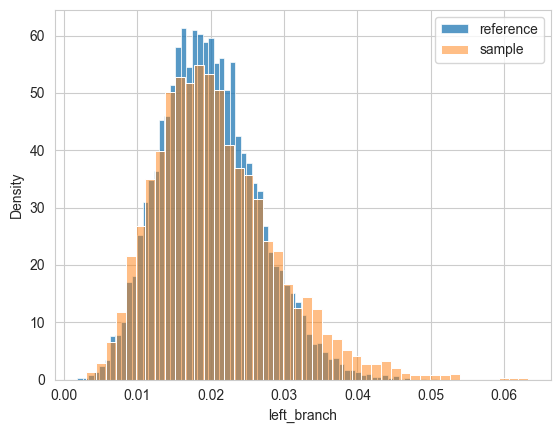

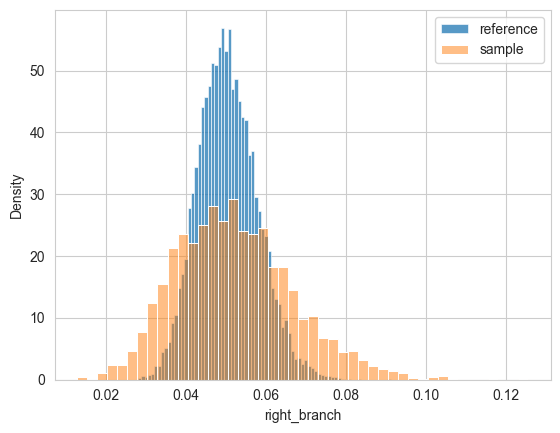

10010000100000000001001000000000000||1000000000000000000000000000000


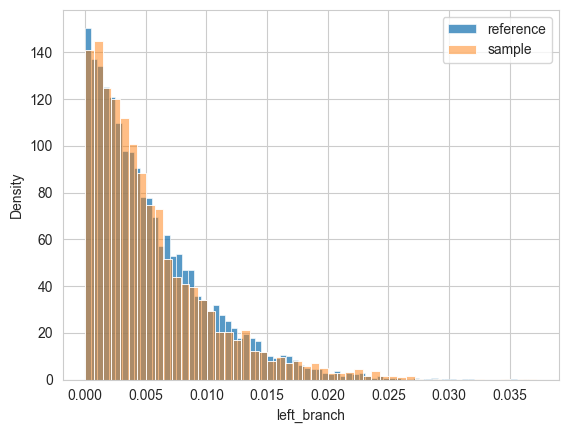

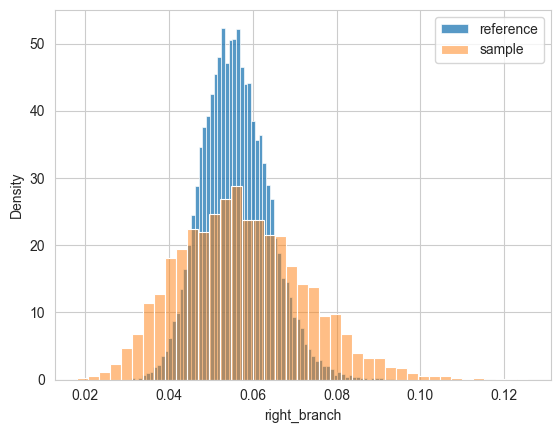

1000000000000000000||10000000000000000000


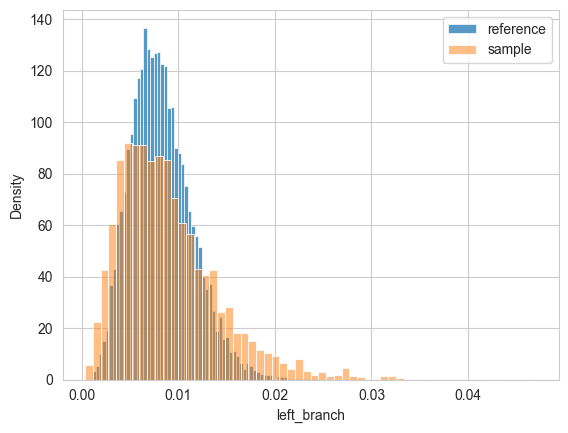

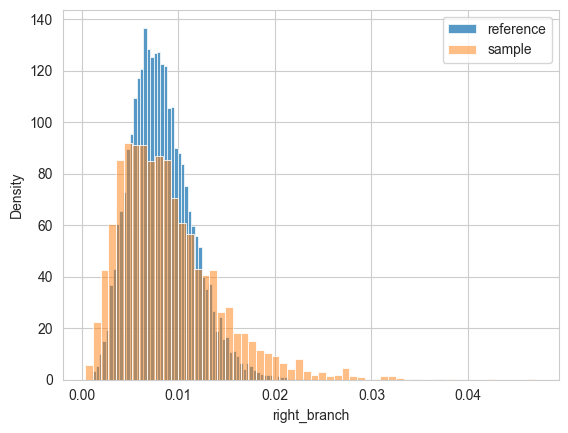

11000000000000000000||10000000000000000000000


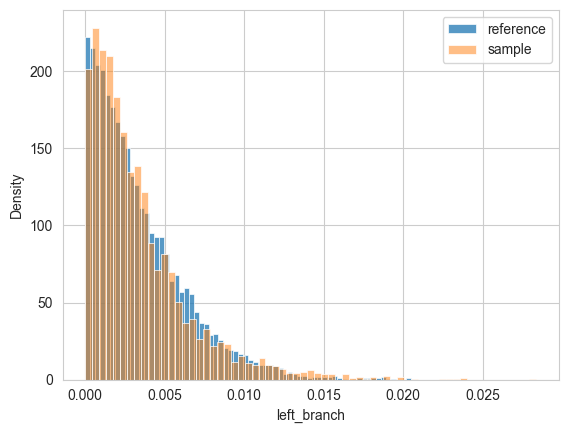

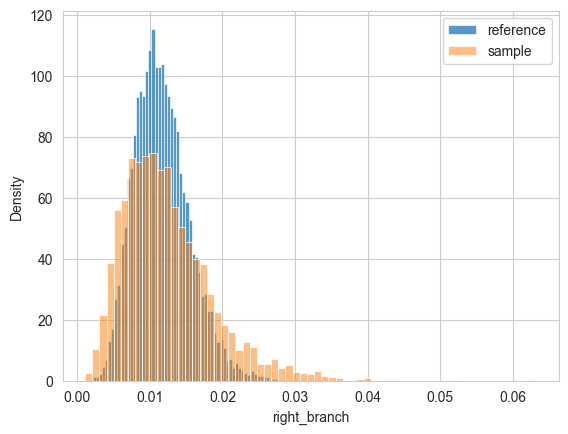

10000000100000000000100000001000000000||10000000000


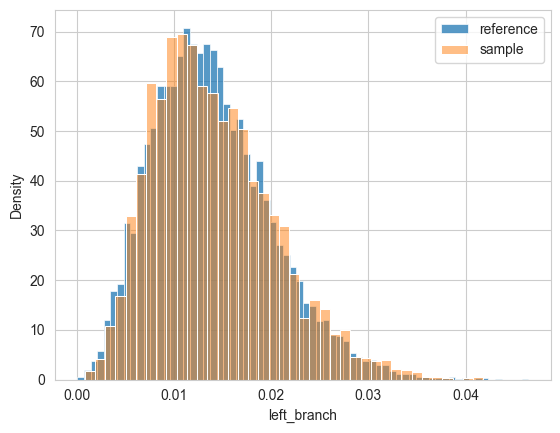

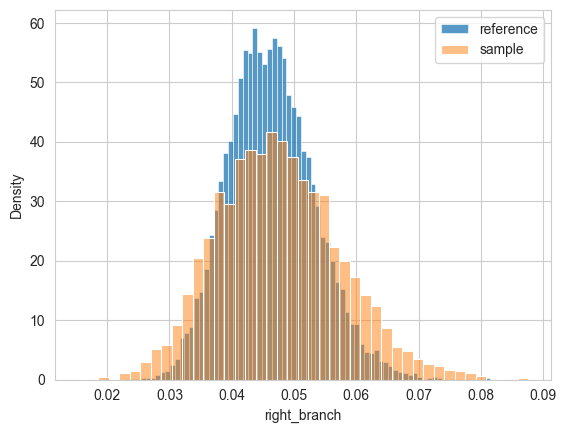

10000000100000000000100000011000000000||10000000000000001000000000000000000000000000


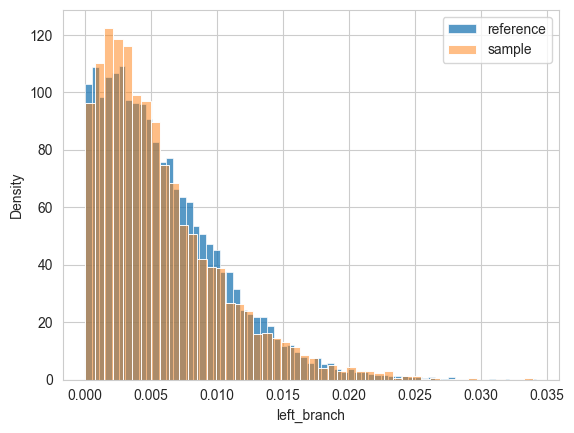

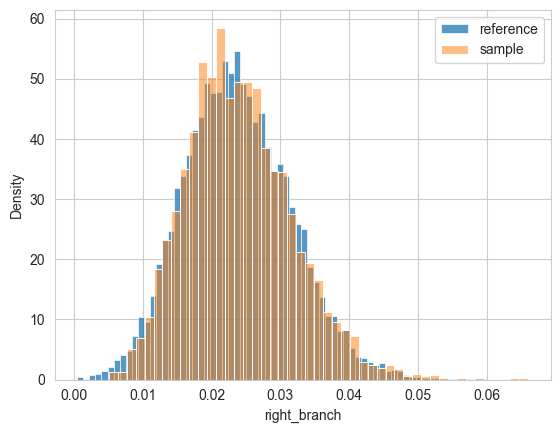

100000000000000000000000000000000000000000001||11110000000000001100010000010011000010000110100010


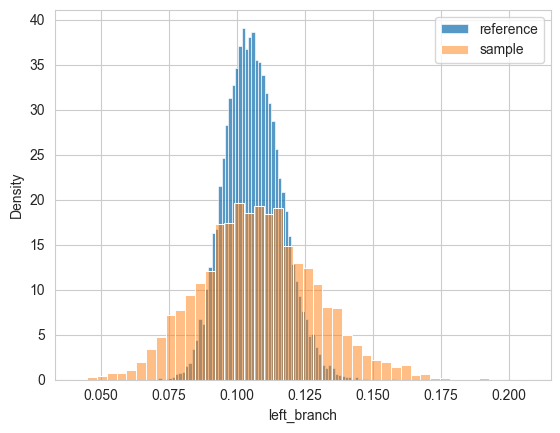

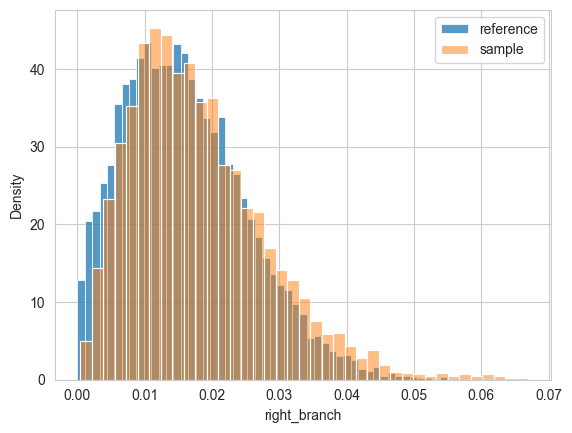

11110100000000011111010100010011001011100110100011||1001111101100000000010101100010100000001011100


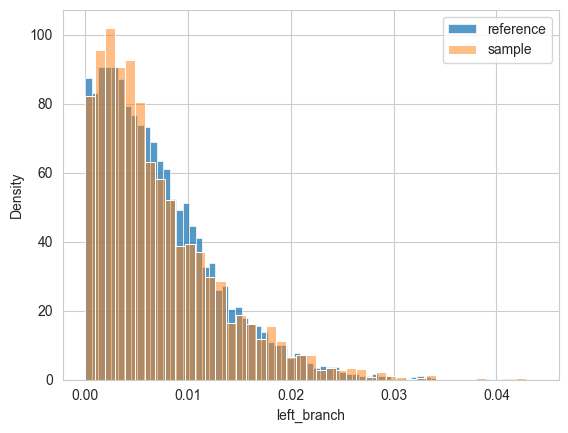

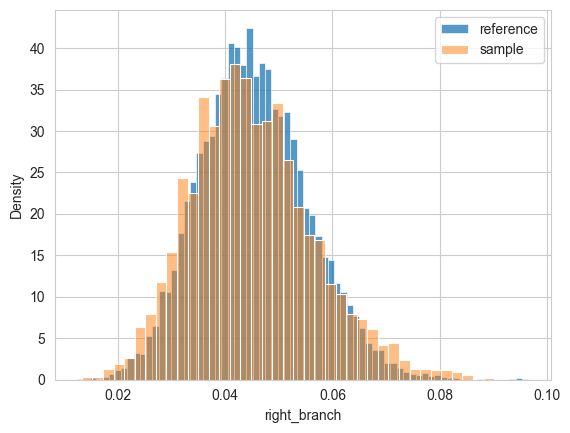

In [13]:
from collections import Counter

for clade, _ in Counter(ref_clades_df.clade).most_common(50):
    print(clade)

    sns.histplot(
        ref_branches[ref_clades_df.clade == clade], 
        x="left_branch", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_clades_df.clade == clade], 
        x="left_branch", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()

    sns.histplot(
        ref_branches[ref_clades_df.clade == clade], 
        x="right_branch", 
        label="reference",
        stat="density",
    )
    sns.histplot(
        sample_branches[sample_clades_df.clade == clade], 
        x="right_branch", 
        label="sample",
        stat="density",
        alpha=0.5,
    )

    plt.legend(loc="upper right")
    plt.show()



<Axes: ylabel='Density'>

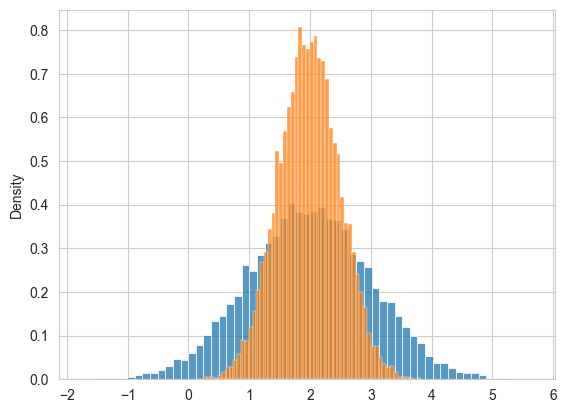

In [14]:
import numpy as np
import seaborn as sns
x = np.random.normal(2, 1, 10000)

sns.histplot(x, stat="density",)

y = (x - np.mean(x)) * 0.5 + np.mean(x)

sns.histplot(y, stat="density",)

In [15]:
log_ref_heights = np.log(ref_tree_heights)
log_sample_heights = np.log(sample_tree_heights)

In [16]:
x = np.random.normal(np.mean(log_ref_heights), np.std(log_ref_heights), 100000)

<Axes: ylabel='Density'>

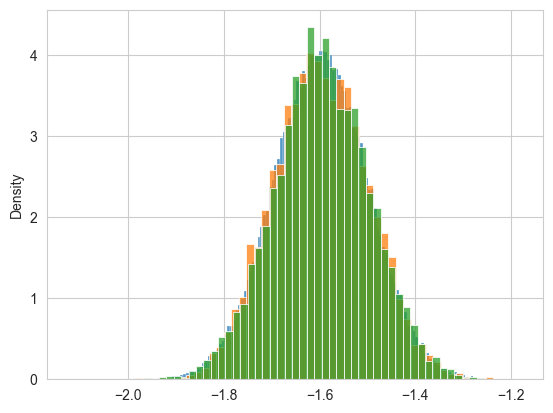

In [17]:
sns.histplot(x, stat="density")
sns.histplot(log_ref_heights, stat="density")
sns.histplot(log_sample_heights, stat="density")